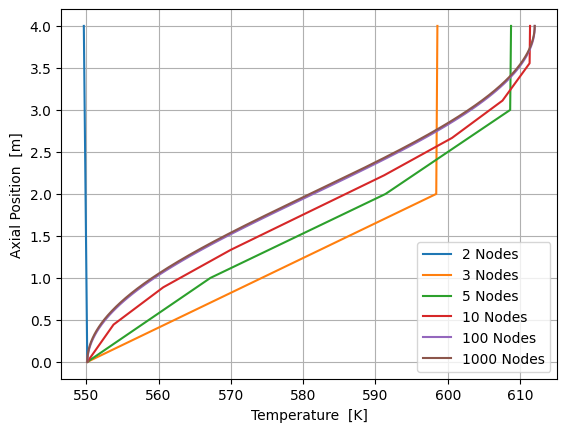

	Maximum Temperatures
------------------------------------
Fuel: 1810.9663444219623
Clad: 661.2427438613042
Fluid: 612.0205543791428


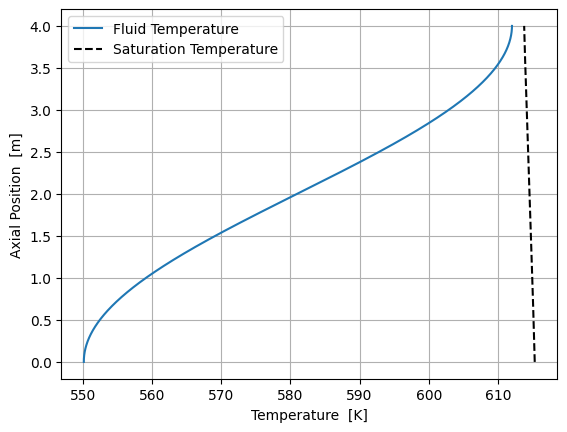

onb: 1.8378378378378377


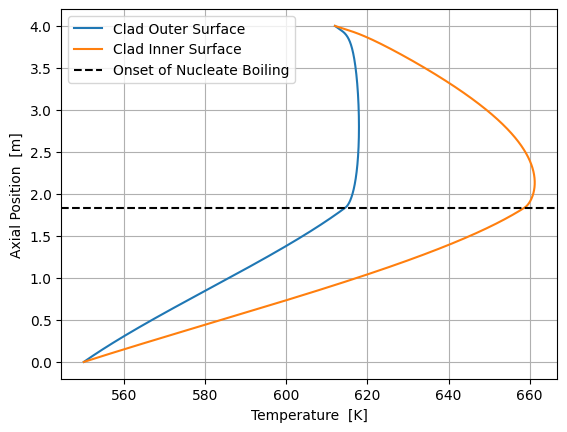

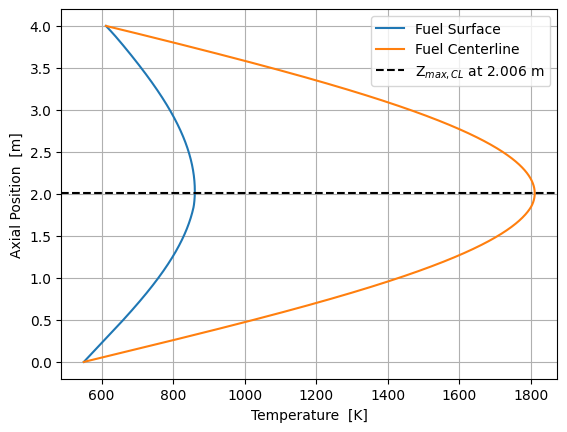

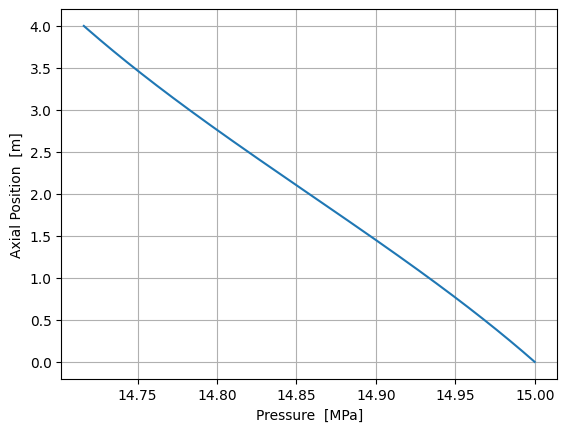

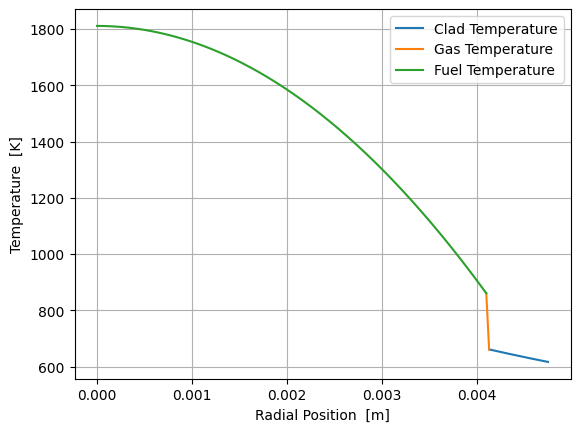

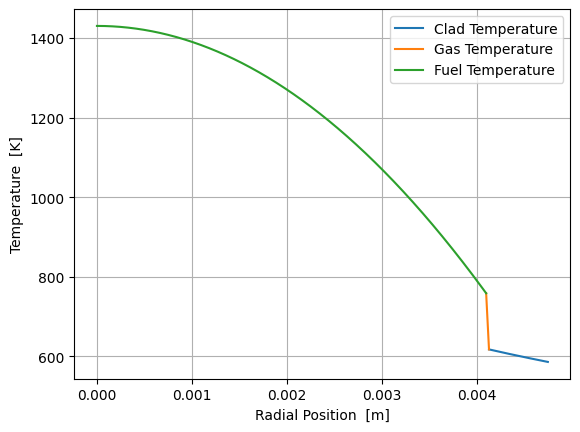

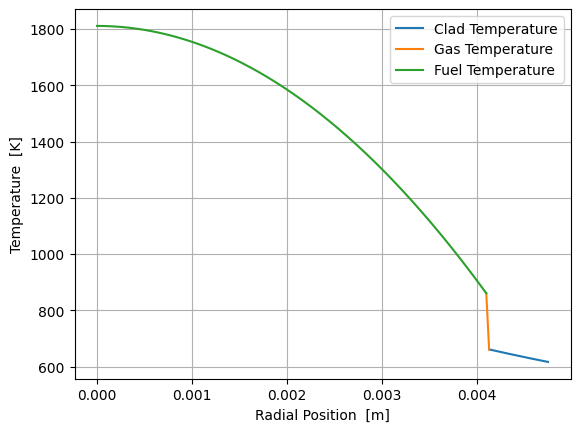

zmax: 2.006006006006006


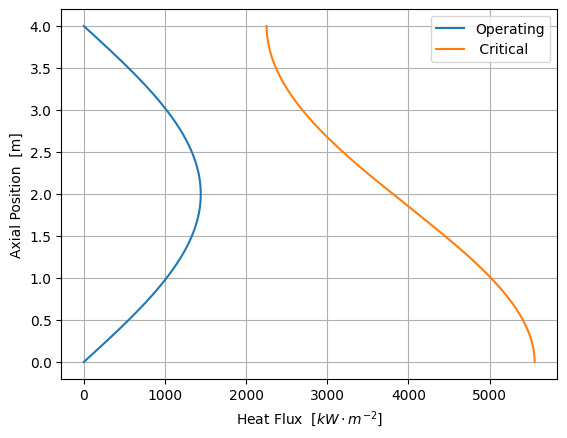

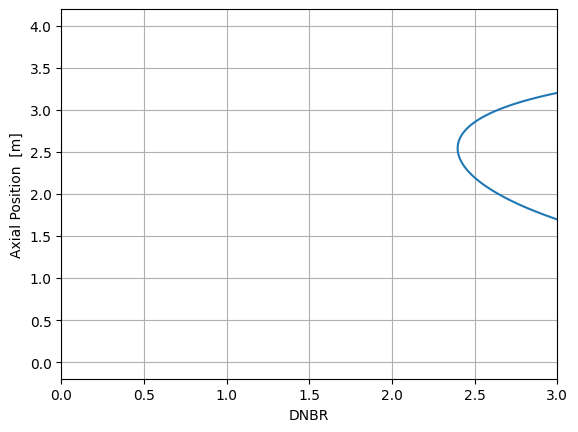

dnbr: 2.3972580181344783



	    Sensitivity
-----------------------------------
\toprule
\bottomrule
q'_{0}  [$W\cdotcm^{-1}$] & 215.0 & 322.5 & 430.0 & 537.5 & 645.0 \\
\hline
T_{max,CL}  [$K$] & 1182.065 & 1498.145 & 1811.012 & 2111.856 & 2411.461 \\
\toprule
\bottomrule
G  [$kg\cdot m^{-2} \cdot s^{-1}$] & 2000.0 & 3000.0 & 4000.0 & 5000.0 & 6000.0 \\
\hline
T_{max,CL}  [$K$] & 1814.255 & 1813.359 & 1811.012 & 1801.556 & 1792.889 \\
\toprule
\bottomrule
T_{f,in}  [$K$] & 492.2462969991857 & 523.0116905616347 & 553.7770841240839 & 584.542477686533 & 609.1547925364923 \\
\hline
T_{max,CL}  [$K$] & 1762.829 & 1790.371 & 1811.646 & 1813.957 & 1814.247 \\
\toprule
\bottomrule
P_{in}  [$MPa$] & 11.25 & 13.125 & 15.0 & 16.875 & 18.75 \\
\hline
T_{max,CL}  [$K$] & 1792.731 & 1802.641 & 1811.012 & 1814.371 & 1814.3 \\


In [1]:
from NPRE449CP import *
#plotter = Plotter('BWR',show = False)

In [36]:
import openmc
import matplotlib.pyplot as plt

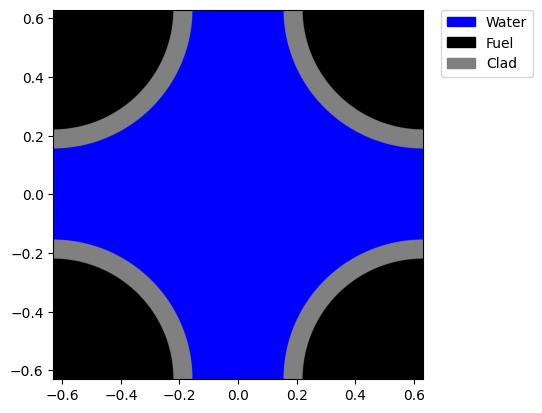

In [44]:
model = openmc.Model()

fuel = openmc.Material(name='Fuel')
fuel.add_elements_from_formula('UO2')
clad = openmc.Material(name = 'Clad')
clad.add_elements_from_formula('ZrO2')
water = openmc.Material(name = 'Water')
water.add_elements_from_formula('H2O')

pitch = 1.26
rco = .95/2
rf = .41
gt = 0.006
rci = rf + gt/2

def plane(x):
    return openmc.YPlane(y0 =x)
f,b = plane(-pitch/2),plane(pitch/2)

def plane(x):
    return openmc.XPlane(x0 =x)

l,r = plane(-pitch/2), plane(pitch/2)

def cyl(x0,y0, r):
    return openmc.ZCylinder(r=r,x0 = x0, y0 = y0)
x,y = pitch/2,pitch/2
blf, ulf, brf, urf = cyl(-x,-y,rf), cyl(-x,y,rf), cyl(x,-y,rf), cyl(x,y,rf)
blcc, ulc, brcc, urc = cyl(-x,-y,rco), cyl(-x,y,rco), cyl(x,-y,rco), cyl(x,y,rco)

tl = openmc.Cell(region=-ulf & -b & +l, fill = fuel)
tr = openmc.Cell(region= -urf & -b & -r, fill = fuel)
bl = openmc.Cell(region= -blf & +f & +l, fill = fuel)
br = openmc.Cell(region = -brf& + f & -r, fill = fuel)

tlc = openmc.Cell(region=+ulf & -ulc & -b & +l, fill = clad)
trc = openmc.Cell(region= +urf & -urc &  -b & -r, fill = clad)
blc = openmc.Cell(region= +blf & -blcc & +f & +l, fill = clad)
brc = openmc.Cell(region = +brf& -brcc & + f & -r, fill = clad)

h20 = openmc.Cell(region = +brcc & +blcc & +urc & + ulc &-b & +f & -r & +l, fill = water)

uni = openmc.Universe(cells = [tl,tr,bl,br, tlc,trc, blc, brc, h20])
fig,ax = plt.subplots()
uni.plot(pixels=10000000,color_by='material',legend=True,colors={water:'blue', fuel:'black', clad:'gray'},axes = ax)
fig.savefig('geometry.png',dpi = 600)
plt.show()

In [5]:
solver = Solver()

In [ ]:
solver.solvePinTemperature()